# MARKET SEGMENTATION USING MCDONALDS DATA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

## Exploring Data

In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
df.replace(to_replace=('Yes','No'), value=(1,0), inplace = True)

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


Text(0.5, 1.0, 'Age distribution')

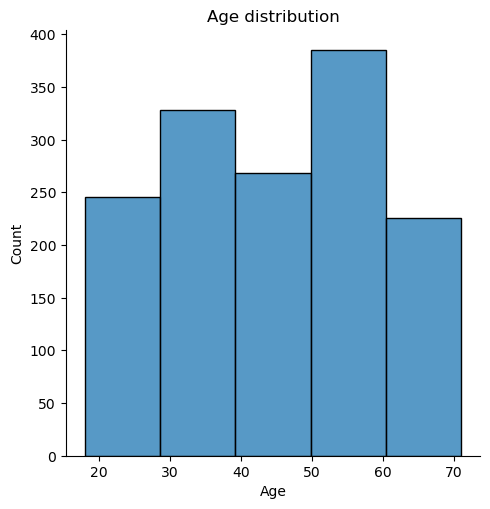

In [7]:
sns.displot(df['Age'],kde=False,bins=5)
plt.title("Age distribution")

In [8]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [9]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

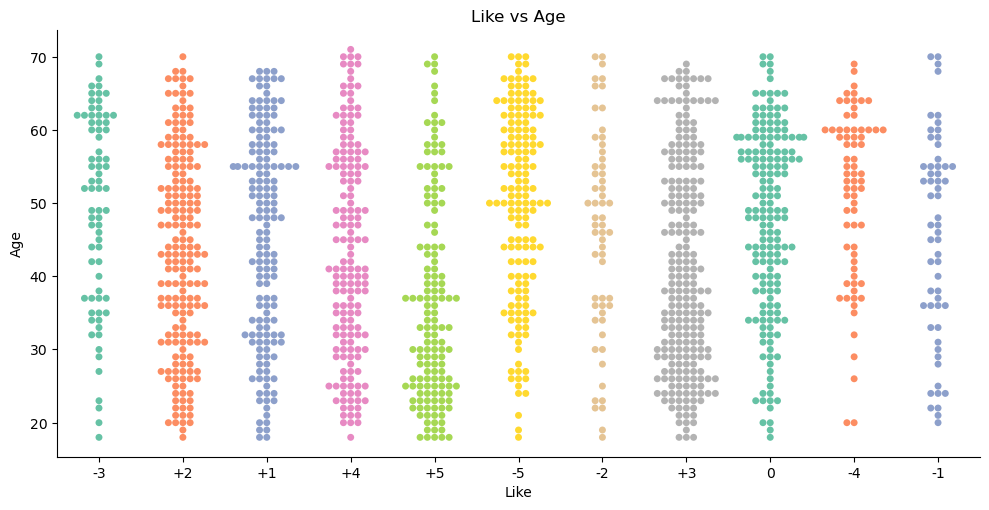

In [10]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Like vs Age')
plt.show()

In [11]:
df1=df.iloc[:,0:11]

In [12]:
df1.describe().round(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.00,1453.00,1453.00,1453.00,1453.00,1453.0,1453.00,1453.00,1453.00,1453.0,1453.00
mean,0.55,0.91,0.09,0.87,0.53,0.9,0.60,0.64,0.36,0.2,0.24
std,0.50,0.29,0.29,0.34,0.50,0.3,0.49,0.48,0.48,0.4,0.43
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
25%,0.00,1.00,0.00,1.00,0.00,1.0,0.00,0.00,0.00,0.0,0.00
50%,1.00,1.00,0.00,1.00,1.00,1.0,1.00,1.00,0.00,0.0,0.00
75%,1.00,1.00,0.00,1.00,1.00,1.0,1.00,1.00,1.00,0.0,0.00
max,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00


In [13]:
df1.sum()

yummy          803
convenient    1319
spicy          136
fattening     1260
greasy         765
fast          1308
cheap          870
tasty          936
expensive      520
healthy        289
disgusting     353
dtype: int64

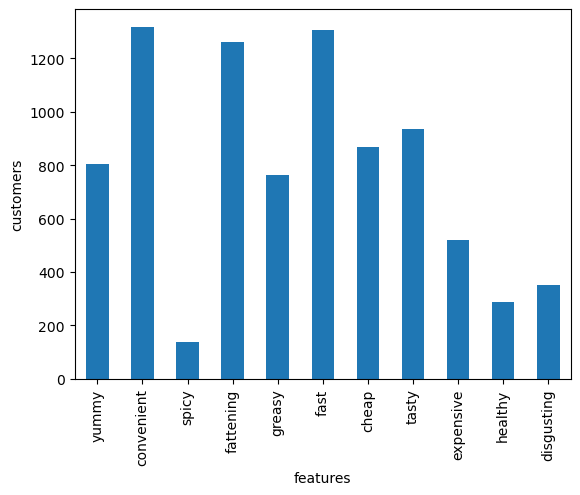

In [14]:
df1.sum().plot.bar()
plt.xlabel("features")
plt.ylabel("customers")
plt.show()

In [15]:
df1.mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [16]:
df1.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


<AxesSubplot:>

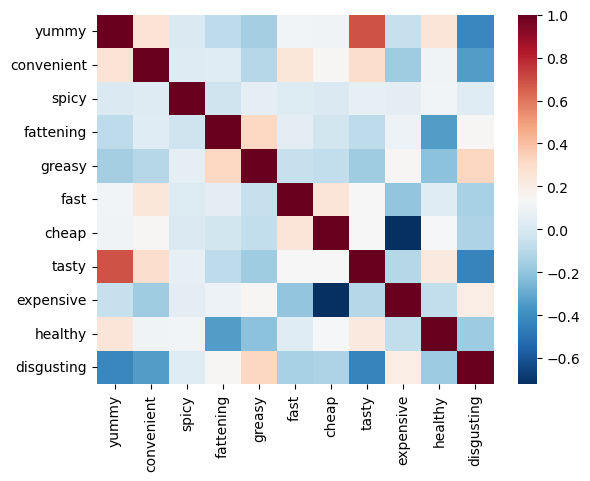

In [17]:
sns.heatmap(df1.corr(),cmap="RdBu_r")

## Principal Components Analysis

In [18]:
pca = PCA(n_components=11)
pca.fit(df1)

PCA(n_components=11)

In [19]:
pca.explained_variance_ratio_.round(3)

array([0.299, 0.193, 0.133, 0.083, 0.059, 0.05 , 0.044, 0.04 , 0.037,
       0.032, 0.029])

In [20]:
pca.explained_variance_ratio_.cumsum().round(3)

array([0.299, 0.492, 0.625, 0.708, 0.768, 0.818, 0.862, 0.902, 0.938,
       0.971, 1.   ])

In [21]:
pca.feature_names_in_

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype=object)

In [22]:
pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],columns=pca.feature_names_in_)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
PC1,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
PC2,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
PC3,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
PC4,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
PC5,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
PC6,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
PC7,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
PC8,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
PC9,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
PC10,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


In [23]:
score=pca.fit_transform(df1)
score

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [24]:
componentsdf=pd.DataFrame(data=score,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
componentsdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

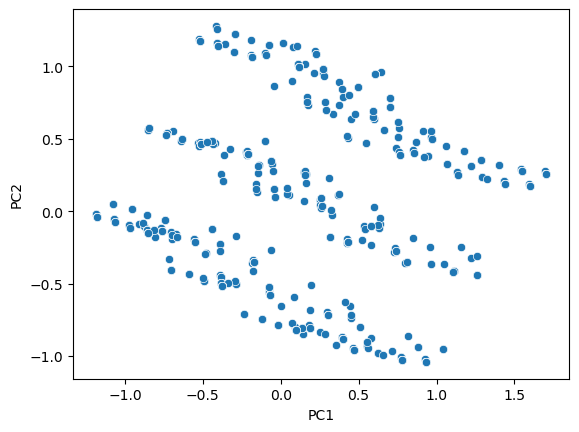

In [25]:
sns.scatterplot(x='PC1',y='PC2',data=componentsdf)

In [26]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        
        plt.text(coeff[i,0]*1.06, coeff[i,1]*1.06 , labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')

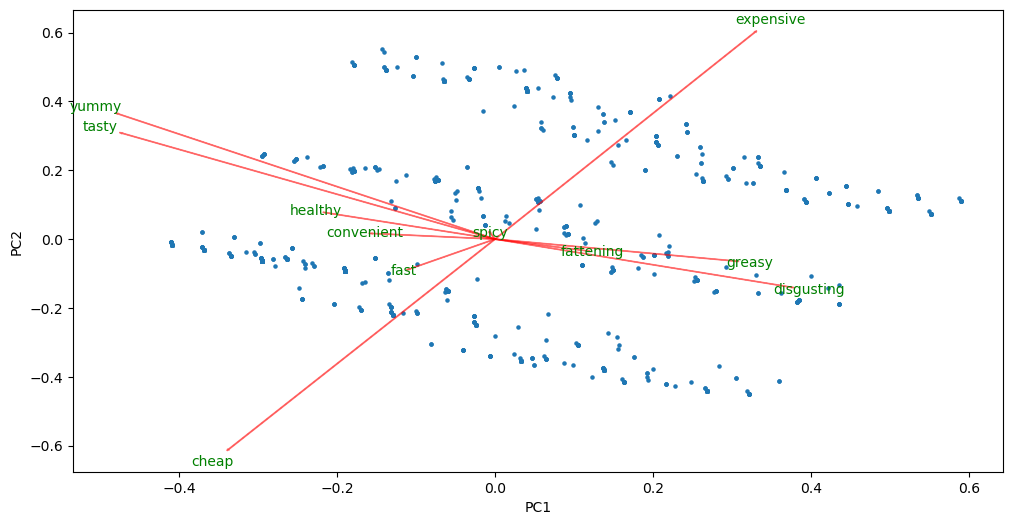

In [27]:
plt.figure(figsize=(12, 6))
biplot(score, np.transpose(pca.components_), pca.feature_names_in_)

## Segmenting the market using Kmeans Clustering

In [28]:
cluster_distance=[]
ri=[]
for k in range(2,9):
    kmeans=KMeans(k,random_state=1234).fit(df1)
    cluster_distance.append(kmeans.inertia_)
    ri.append(adjusted_rand_score(kmeans.labels_, kmeans.predict(df1)))

In [29]:
cluster_distance

[2145.5037269171585,
 1819.7601235436277,
 1603.0209155570537,
 1434.6104173514605,
 1331.896201861035,
 1247.1021329541043,
 1186.8735456383317]

In [30]:
ri

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

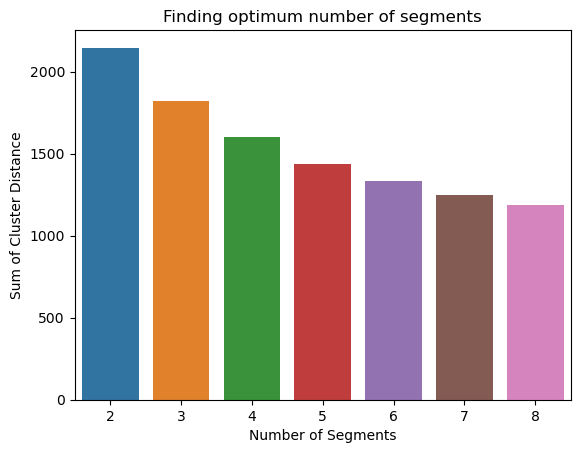

In [31]:
sns.barplot(x=list(range(2,9)),y=cluster_distance)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Cluster Distance")
plt.title("Finding optimum number of segments")
plt.show()

<AxesSubplot:>

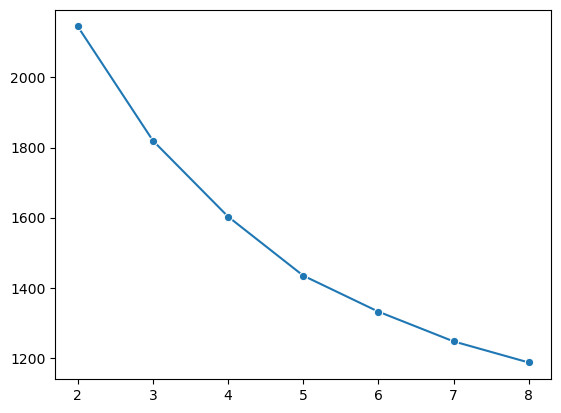

In [32]:
sns.lineplot(x=list(range(2,9)),y=cluster_distance, marker='o',)

In [33]:
ari = []
np.random.seed(1234)
for i in range(100):
    each_cluster=[]
    boot_sample = resample(df1)
    for k in range(2,9):
        km=KMeans(k,random_state=1234).fit(df1)
        each_cluster.append(adjusted_rand_score(kmeans.labels_, km.predict(boot_sample)))
    ari.append(each_cluster)
np.random.seed(1234)

In [34]:
np.shape(ari)

(100, 7)

In [35]:
df3=pd.DataFrame(ari,columns=list(range(2,9)))
df3

,2,3,4,5,6,7,8
0,0.000080,0.000188,0.000520,-0.000488,-0.001948,-0.000752,-0.001649
1,0.001820,0.001284,0.001885,0.002045,0.000646,0.000995,0.001626
2,0.000818,-0.000273,0.001848,-0.000109,-0.001246,-0.001110,0.000687
3,-0.001982,0.000563,0.002625,0.001647,0.001768,0.001238,-0.000532
4,0.002382,0.000847,0.000289,-0.000063,0.000512,0.000652,0.000005
...,...,...,...,...,...,...,...
95,-0.000487,0.002811,0.000962,0.001948,0.000507,-0.000672,0.001133
96,0.000112,0.001235,0.001788,0.000283,-0.000388,-0.000261,-0.001141
97,-0.001312,-0.000012,-0.001242,0.001626,0.003086,0.002029,0.002383
98,-0.000747,-0.000555,-0.000660,0.000524,0.000753,0.000234,0.000128


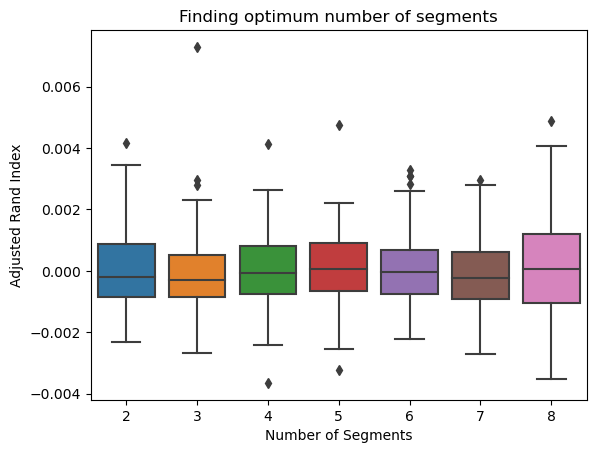

In [36]:
sns.boxplot(x="variable", y="value", data=pd.melt(df3))
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Finding optimum number of segments")
plt.show()

### Concluding optimum number of clusters=4

In [37]:
model = KMeans(n_clusters=4, random_state=1234).fit(df1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

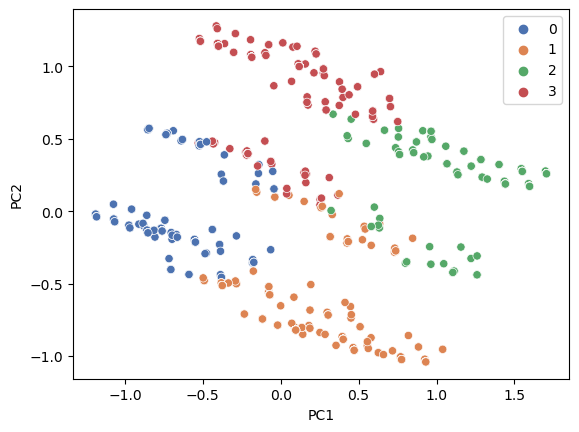

In [38]:
sns.scatterplot(x='PC1',y='PC2',data=componentsdf, hue=model.labels_, palette="deep")

## Segmenting using GaussianMixture

In [39]:
aic=[]
bic=[]
for i in range(2,9):
    gmm=GaussianMixture(n_components=i, n_init=10, random_state=1234).fit(df1)
    bic.append(gmm.bic(df1))
    aic.append(gmm.aic(df1))

[Text(0.5, 0, 'no of clusters')]

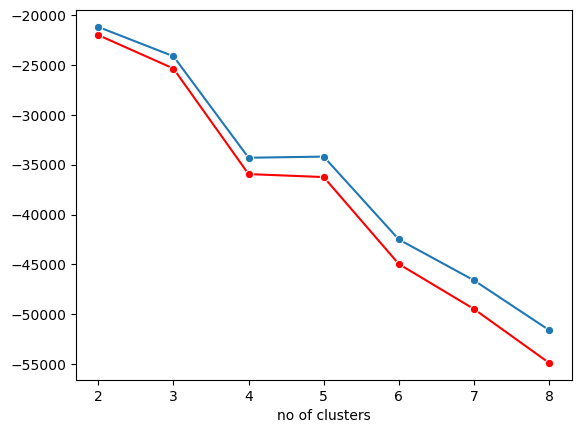

In [40]:
sns.lineplot(x=list(range(2,9)),y=aic, marker='o',color='r')
sns.lineplot(x=list(range(2,9)),y=bic, marker='o').set(xlabel="no of clusters")

### Concluding optimum number of clusters=4

In [41]:
gmm_4=GaussianMixture(n_components=4, n_init=10, random_state=1234).fit(df1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

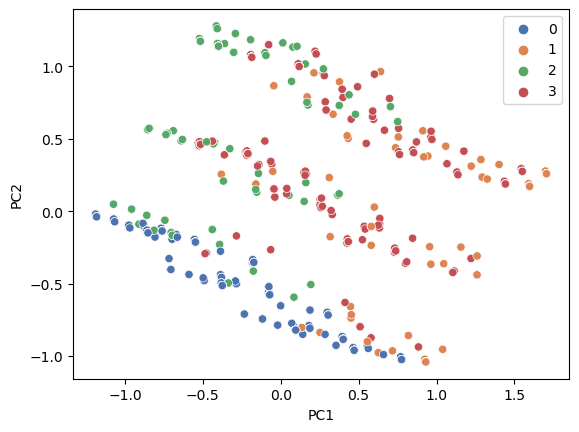

In [42]:
sns.scatterplot(x='PC1',y='PC2',data=componentsdf, hue=gmm_4.predict(df1), palette="deep")

## Describing Segments from Kmeans Clustering

In [43]:
model.labels_

array([1, 3, 3, ..., 3, 0, 2])

In [44]:
df['cluster']=model.labels_

In [45]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [46]:
df['cluster'].value_counts()

0    526
1    373
3    315
2    239
Name: cluster, dtype: int64

In [47]:
cluster_feature_data=df.drop(['Like','Age','VisitFrequency','Gender'],axis=1).groupby('cluster').sum()
cluster_feature_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
cluster,,,,,,,,,,,
0,515,516,43,415,186,504,487,512,10,181,25
1,7,339,32,341,219,356,333,112,5,28,120
2,5,162,18,219,169,178,16,19,215,15,174
3,276,302,43,285,191,270,34,293,290,65,34


<AxesSubplot:ylabel='cluster'>

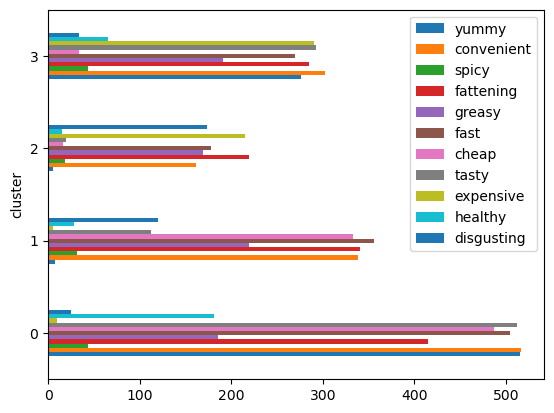

In [48]:
cluster_feature_data.plot.barh()

In [49]:
pd.crosstab(df['cluster'],df['Gender'])

Gender,Female,Male
cluster,,
0,321,205
1,218,155
2,100,139
3,149,166


<AxesSubplot:xlabel='cluster'>

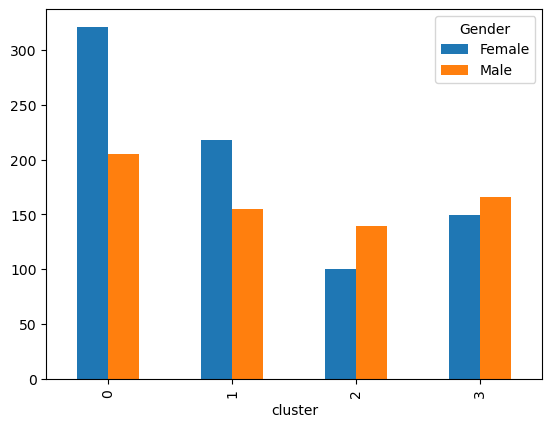

In [50]:
pd.crosstab(df['cluster'],df['Gender']).plot.bar()

In [51]:
pd.crosstab(df['cluster'],df['Like'])

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
cluster,,,,,,,,,,,
0,49,78,138,109,99,10,5,0,3,2,33
1,49,45,17,4,0,30,30,36,38,56,68
2,13,6,8,0,0,12,18,30,27,89,36
3,41,58,66,47,44,6,6,7,3,5,32


<AxesSubplot:ylabel='cluster'>

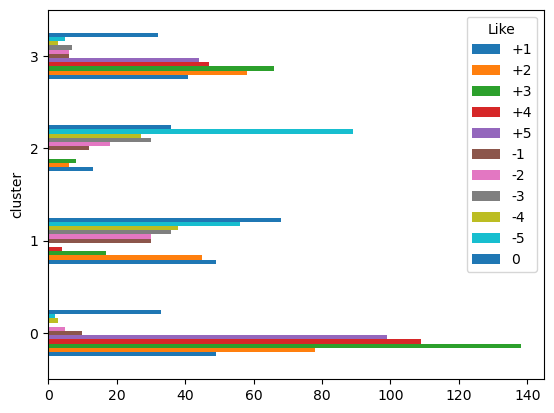

In [52]:
pd.crosstab(df['cluster'],df['Like']).plot.barh()

In [53]:
pd.crosstab(df['cluster'],df['VisitFrequency'])

VisitFrequency,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
cluster,,,,,,
0,112,32,3,215,130,34
1,99,1,60,71,28,114
2,56,1,64,33,12,73
3,75,20,4,120,65,31


<AxesSubplot:xlabel='cluster'>

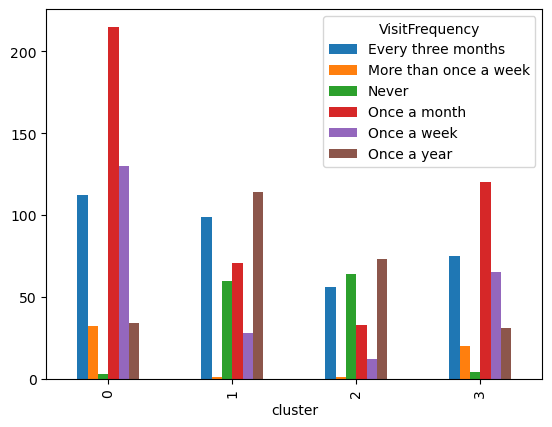

In [54]:
pd.crosstab(df['cluster'],df['VisitFrequency']).plot.bar()

Text(0.5, 1.0, 'Age distribution in segments')

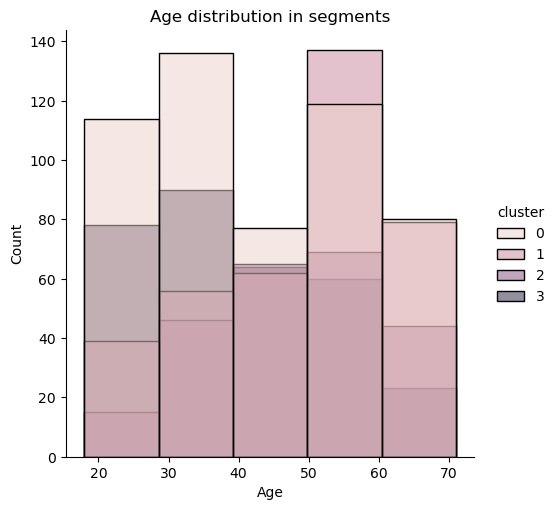

In [55]:
sns.displot(data =df,x='Age',kde=False,bins=5,hue='cluster')
plt.title("Age distribution in segments")

<AxesSubplot:xlabel='cluster', ylabel='Age'>

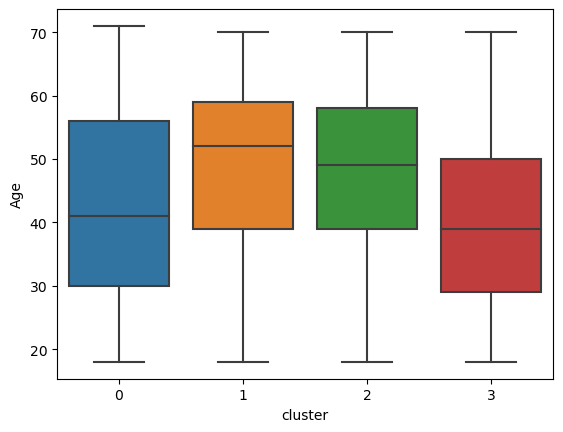

In [56]:
sns.boxplot(x="cluster", y="Age", data=df)

## Selecting (the) Target Segment(s)

In [57]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()

df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster')['Like'].mean()
Like = Like.to_frame().reset_index()

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
segment = Gender.merge(Like, on='cluster', how='left').merge(visit, on='cluster', how='left')
segment


,cluster,Gender,Like,VisitFrequency
0,0,0.389734,2.906844,2.610266
1,1,0.415550,5.793566,2.723861
2,2,0.581590,7.435146,2.682008
3,3,0.526984,3.209524,2.549206


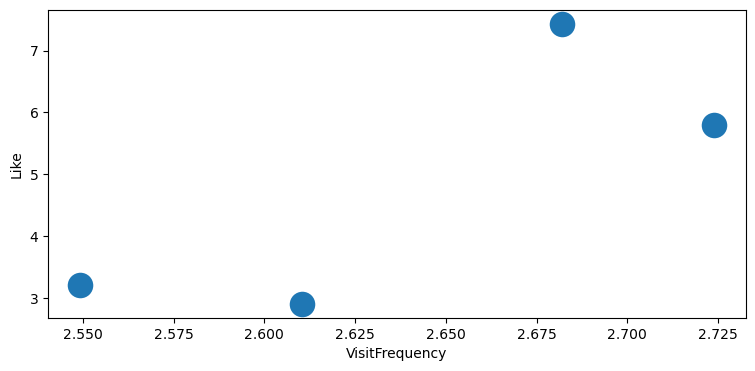

In [58]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400)
plt.show()